# Import libraries

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

# Create model

In [62]:
tree = DecisionTreeClassifier()

# Balanced + 0

## Import dataset

In [149]:
X_0_oh = pd.read_csv('data/2.Balancing/X_0_out_maxmin.csv')
y_0_oh = pd.read_csv('data/2.Balancing/y_0_out_maxmin.csv')

Divide in train and test

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_0_oh, y_0_oh, test_size=0.2)

## Fit the model

In [151]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7906192519926426

In [152]:
tree.score(X_train, y_train)

0.9999233363998773

As the result is 1.0 with the train data, it means that the model is doing overfitting

Check parameters of the decision tree:

In [153]:
tree.max_features_

18

In [154]:
tree.min_samples_split

2

## Check tree depth 

In [155]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 30)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.627, test: 0.632
>2, train: 0.682, test: 0.684
>3, train: 0.690, test: 0.690
>4, train: 0.734, test: 0.737
>5, train: 0.753, test: 0.757
>6, train: 0.760, test: 0.767
>7, train: 0.774, test: 0.772
>8, train: 0.790, test: 0.784
>9, train: 0.814, test: 0.771
>10, train: 0.835, test: 0.796
>11, train: 0.849, test: 0.795
>12, train: 0.866, test: 0.803
>13, train: 0.885, test: 0.796
>14, train: 0.904, test: 0.795
>15, train: 0.920, test: 0.792
>16, train: 0.936, test: 0.796
>17, train: 0.951, test: 0.794
>18, train: 0.962, test: 0.791
>19, train: 0.971, test: 0.792
>20, train: 0.978, test: 0.790
>21, train: 0.984, test: 0.789
>22, train: 0.989, test: 0.789
>23, train: 0.992, test: 0.788
>24, train: 0.994, test: 0.788
>25, train: 0.995, test: 0.786
>26, train: 0.998, test: 0.789
>27, train: 0.999, test: 0.788
>28, train: 0.999, test: 0.784
>29, train: 1.000, test: 0.789


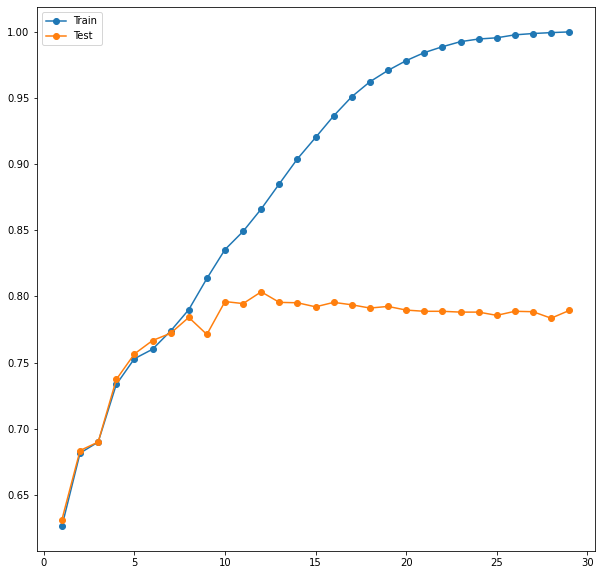

In [156]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## GridSearch

In [206]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1,30), None],
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [207]:
model_sel = GridSearchCV(estimator = tree, 
                        param_grid = params, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2)

In [208]:
model_sel.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   15.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [range(1, 30), None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

In [209]:
model_sel.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=6)

In [210]:
model_sel.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [211]:
model_sel.score(X_test, y_test)

0.8071735131820968

## Classification report

In [212]:
y_pred = model_sel.predict(X_test)

In [213]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2060
           1       0.76      0.70      0.73      1202

    accuracy                           0.81      3262
   macro avg       0.80      0.79      0.79      3262
weighted avg       0.81      0.81      0.81      3262



83% of the 0 are correctly classified

76% of the 1 are correctly classified

# Balanced X,y with mean and KNN

In [214]:
X_mean_knn = pd.read_csv('data/2.Balancing/X_mean_knn_out_minmax.csv')
y_mean_knn = pd.read_csv('data/2.Balancing/y_mean_knn_out_minmax.csv')

Divide the data en train and test:

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_mean_knn, y_mean_knn, test_size=0.2)

## Fit the model

In [216]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8214505224339275

In [217]:
tree.score(X_train, y_train)

1.0

As the result is 1.0 with the train data, it means that the model is doing overfitting

## Check tree depth 

In [220]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 30)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

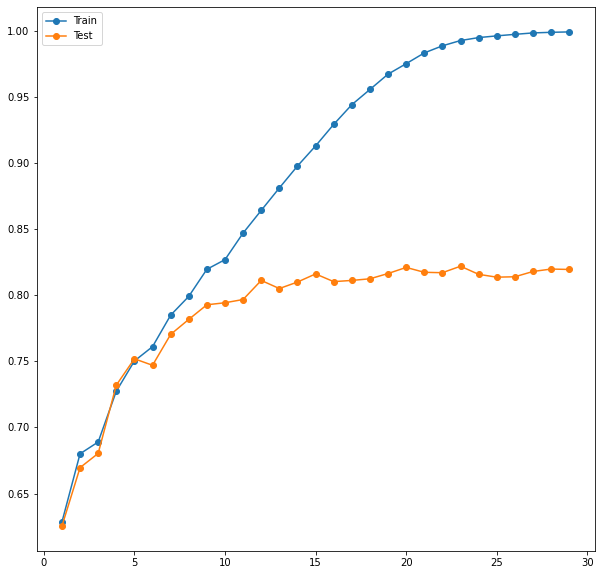

In [221]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## GridSearch

In [222]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1,30), None],
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [223]:
model_sel = GridSearchCV(estimator = tree, 
                        param_grid = params, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2)

In [224]:
model_sel.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 2942 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   15.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [range(1, 30), None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

In [225]:
model_sel.best_estimator_

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=9)

In [226]:
model_sel.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'best'}

In [227]:
model_sel.score(X_test, y_test)

0.8205285802089736

## Classification report

In [228]:
y_pred = model_sel.predict(X_test)

In [229]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2035
           1       0.77      0.74      0.75      1219

    accuracy                           0.82      3254
   macro avg       0.81      0.80      0.81      3254
weighted avg       0.82      0.82      0.82      3254



# Filled with 0

## Import dataset

In [230]:
df = pd.read_csv('data/0.NaNs/df_0_oh.csv')

In [231]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.0,0.20,0.20,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.00,0.10,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.20,0.20,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.05,0.14,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.02,0.05,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0


In [232]:
X_0 = df.drop('Revenue', axis=1)
y_0 = df.Revenue

Divide in train and test

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.2)

## Fit the model

In [234]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.7870784234051199

In [235]:
tree.score(X_train, y_train)

1.0

As the result is 1.0 with the train data, it means that the model is doing overfitting

## Check tree depth 

In [236]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 30)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

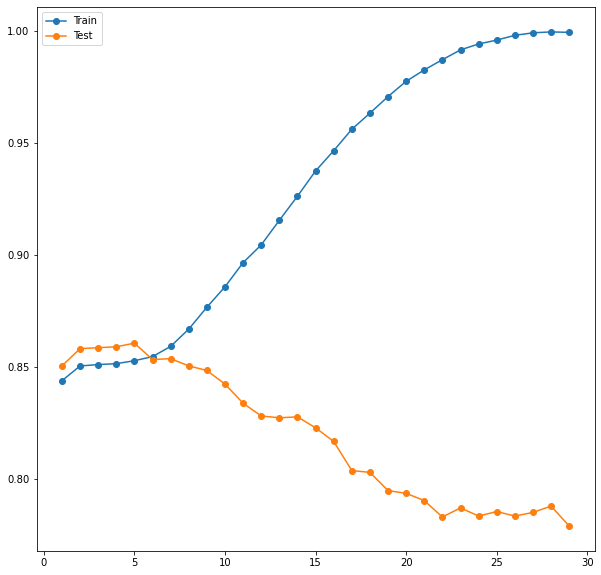

In [237]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## GridSearch

In [238]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1,30), None],
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [239]:
model_sel = GridSearchCV(estimator = tree, 
                        param_grid = params, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2)

In [240]:
model_sel.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1906 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   10.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [range(1, 30), None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

In [241]:
model_sel.best_estimator_

DecisionTreeClassifier(min_samples_leaf=9, min_samples_split=8,
                       splitter='random')

In [242]:
model_sel.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 8,
 'splitter': 'random'}

In [243]:
model_sel.score(X_test, y_test)

0.8447785453067859

## Classification report

In [244]:
y_pred = model_sel.predict(X_test)

In [245]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2093
           1       0.46      0.21      0.29       368

    accuracy                           0.84      2461
   macro avg       0.67      0.59      0.60      2461
weighted avg       0.81      0.84      0.82      2461



# Filled with mean and KNN

## Import dataset

In [246]:
df = pd.read_csv('data/0.NaNs/df_mean_knn.csv')

In [247]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor,PageValues
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,2.0,4.0,1.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,479.647091,0.05,0.14,0.0,2.0,3.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,2.0,3.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0


In [248]:
X_mean = df.drop('Revenue', axis=1)
y_mean = df.Revenue

Divide in train and test

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size=0.2)

## Fit the model

In [250]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.778138967899228

In [251]:
tree.score(X_train, y_train)

1.0

As the result is 1.0 with the train data, it means that the model is doing overfitting

## Check tree depth 

In [139]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 30)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

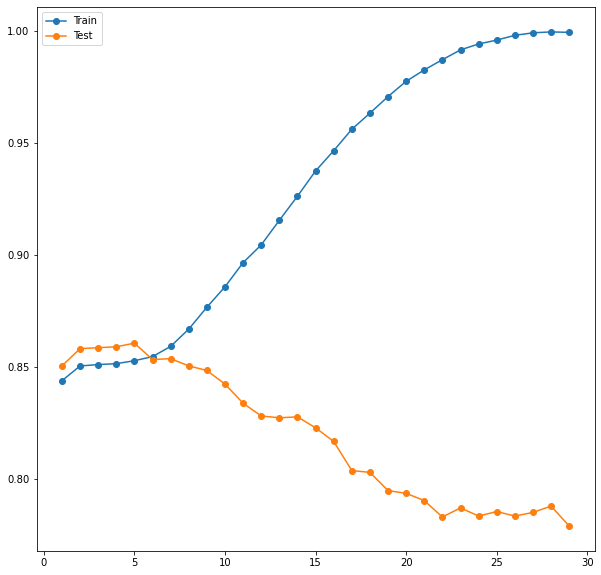

In [252]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## GridSearch

In [254]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1,30), None],
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [255]:
model_sel = GridSearchCV(estimator = tree, 
                        param_grid = params, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2)

In [256]:
model_sel.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1906 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   10.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [range(1, 30), None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

In [257]:
model_sel.best_estimator_

DecisionTreeClassifier(min_samples_leaf=9, min_samples_split=6,
                       splitter='random')

In [258]:
model_sel.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'splitter': 'random'}

In [259]:
model_sel.score(X_test, y_test)

0.8277123120682649

## Classification report

In [260]:
y_pred = model_sel.predict(X_test)

In [261]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      2076
         1.0       0.37      0.14      0.20       385

    accuracy                           0.83      2461
   macro avg       0.61      0.55      0.55      2461
weighted avg       0.78      0.83      0.79      2461



# PCA mean KNN

## Import dataset

In [262]:
df = pd.read_csv('data/3.PCA/pca_kmean_df.csv')

In [263]:
df.head()

,pca_1,pca_2,pca_3,pca_4
0,-481.989305,-51.104192,-6.907232,-19.427204
1,-418.017332,-53.230313,-6.939245,-19.247278
2,-483.031968,-52.355638,-7.491542,-19.311005
3,-2.650696,-67.496781,-7.530095,-24.518475
4,145.224605,-71.999507,-7.262116,-18.435796


In [248]:
X_mean = df.drop('Revenue', axis=1)
y_mean = df.Revenue

Divide in train and test

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_mean, y_mean, test_size=0.2)

## Fit the model

In [250]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.778138967899228

In [251]:
tree.score(X_train, y_train)

1.0

As the result is 1.0 with the train data, it means that the model is doing overfitting

## Check tree depth 

In [139]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 30)]

# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    
    # fit model on the training dataset
    model.fit(X_train, y_train)

    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

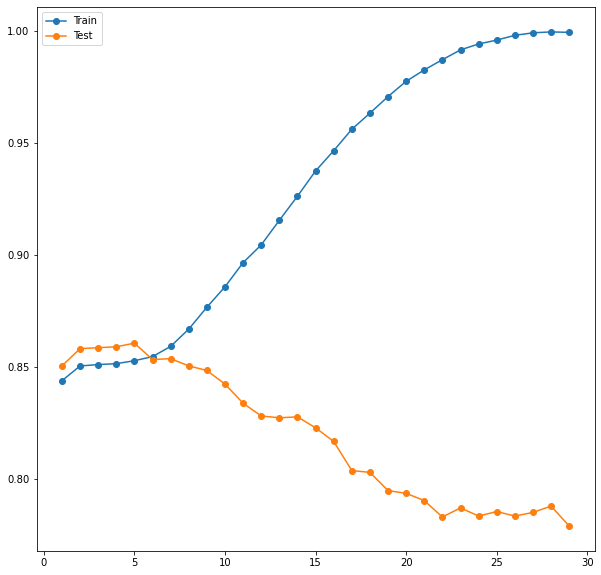

In [252]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## GridSearch

In [254]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [range(1,30), None],
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [255]:
model_sel = GridSearchCV(estimator = tree, 
                        param_grid = params, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2)

In [256]:
model_sel.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1906 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   10.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [range(1, 30), None],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=2)

In [257]:
model_sel.best_estimator_

DecisionTreeClassifier(min_samples_leaf=9, min_samples_split=6,
                       splitter='random')

In [258]:
model_sel.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'splitter': 'random'}

In [259]:
model_sel.score(X_test, y_test)

0.8277123120682649

## Classification report

In [260]:
y_pred = model_sel.predict(X_test)

In [261]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      2076
         1.0       0.37      0.14      0.20       385

    accuracy                           0.83      2461
   macro avg       0.61      0.55      0.55      2461
weighted avg       0.78      0.83      0.79      2461



# Conclusions

The results are better with the dataset with balanced data, filled with mean values and KNN for the page values feature